In [1]:
from sklearn.datasets import load_digits

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
digits=load_digits()

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

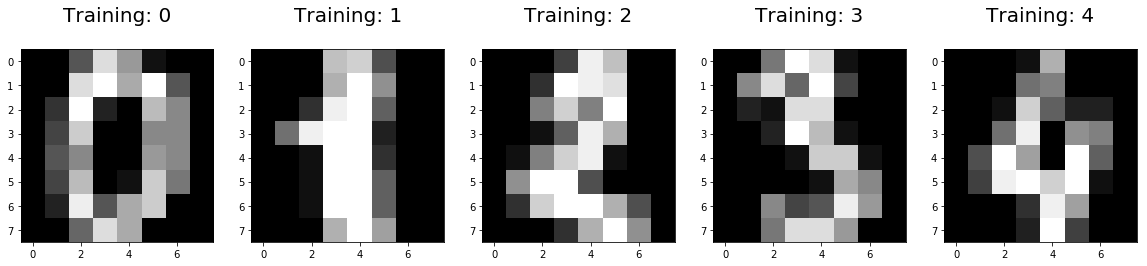

In [32]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label,fontsize=20)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(
    digits.data,digits.target,test_size=0.25,random_state=0)

In [9]:
print(x_train)

[[ 0.  3. 13. ... 12.  9.  1.]
 [ 0.  0.  1. ... 13.  1.  0.]
 [ 0.  0.  4. ...  9.  0.  0.]
 ...
 [ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  6. ... 11.  0.  0.]]


In [10]:
print(x_test)

[[ 0.  0. 11. ... 13. 16.  8.]
 [ 0.  1. 15. ...  1.  0.  0.]
 [ 0.  2. 13. ... 16. 16.  3.]
 ...
 [ 0.  0. 11. ...  7.  0.  0.]
 [ 0.  0.  5. ...  7.  0.  0.]
 [ 0.  2. 14. ...  6.  0.  0.]]


In [11]:
print(y_train)

[2 8 9 ... 7 7 8]


In [12]:
print(y_test)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


In [13]:
print(x_train.shape)

(1347, 64)


In [14]:
print(x_test.shape)

(450, 64)


In [15]:
print(y_train.shape)

(1347,)


In [17]:
print(y_test.shape)

(450,)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr=LogisticRegression()

In [20]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
lr.predict(x_test[0].reshape(1,-1))

array([2])

In [23]:
lr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [25]:
predictions=lr.predict(x_test)

In [28]:
predictions.shape

(450,)

In [27]:
score=lr.score(x_test,y_test)

In [29]:
print(score)

0.9533333333333334


In [34]:
def plot_confusion_matrix(cm,title='Confusion matrix',cmap='pastell'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title,size=15)
    plt.colorbar()
    tick_marks=np.arrange(10)
    plt.xticks(tick_marks,["0","1","2","3","4","5","6","7","8","9"],rotation=45,size=10)
    plt.yticks(tick_marks,["0","1","2","3","4","5","6","7","8","9"],size=10)
    plt.tight_layout()
    plt.ylabel('Actual label',size=15)
    plt.xlabel('Predicted label',size=15)
    width, height =cm.shape
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y,x),
                    horizontalignment='center',
                    verticalalignment='center')

In [4]:
confusion=metrics.confusion_matrix(y_test,predictions)
print('confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();


NameError: name 'y_test' is not defined

In [36]:
predictions=lr.predict(x_test)

In [38]:
cm=metrics.confusion_matrix(y_test, predictions)

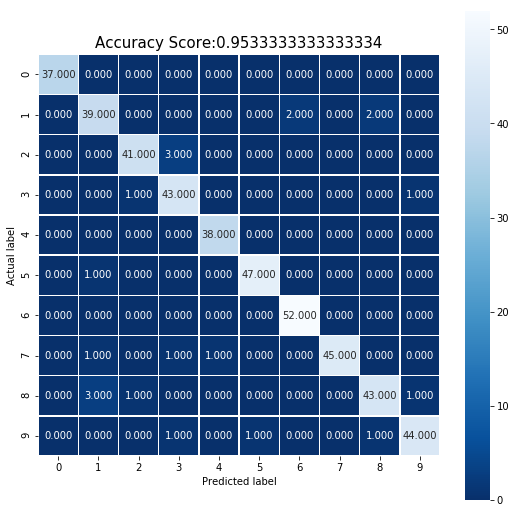

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=15);

In [40]:
index=0
misclassifiedIndex=[]
for predict, actual in zip(predictions, y_test):
    if predict != actual:
        misclassifiedIndex.append(index)
    index+=1

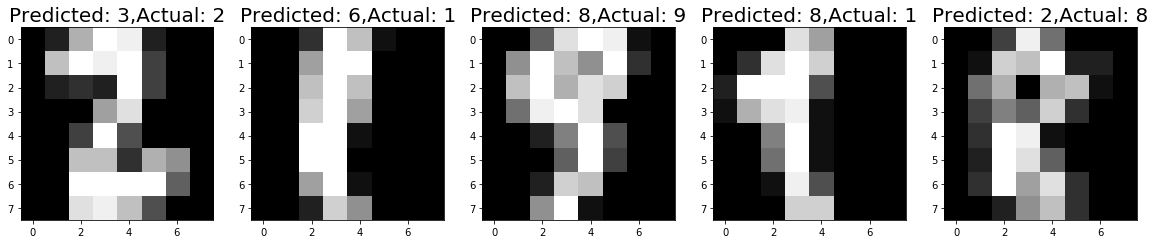

In [41]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {},Actual: {}'.format(predictions[wrong],y_test[wrong]),fontsize=20)